In [4]:
import pandas as pd


In [7]:
raw_data = pd.read_csv('./data_counsel_chat_with_dolly_answers.csv')
raw_data.head()


,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,questionID,questionTitle,questionText,questionLink,topic,therapistInfo,therapistURL,answerText,upvotes,views,split,dollyAnswerText
0,0,0,0,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,"Sherry Katz, LCSWCouples and Family Therapist,...",https://counselchat.com/therapists/sherry-katz...,"If everyone thinks you're worthless, then mayb...",1,2899,train,"First of all, please seek professional help. I..."
1,1,1,1,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,"Robin Landwehr, DBH, LPCC, NCCMental Health in...",https://counselchat.com/therapists/robin-landw...,"Hello, and thank you for your question and see...",1,3514,train,"First, you need to find someone who will list..."
2,2,2,2,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,Lee KingI use an integrative approach to treat...,https://counselchat.com/therapists/lee-king,First thing I'd suggest is getting the sleep y...,0,5,train,The first step is acknowledging that you have ...
3,3,3,3,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,"Shauntai Davis-YearginPersonalized, private on...",https://counselchat.com/therapists/shauntai-da...,Therapy is essential for those that are feelin...,0,31,train,"I don't know if you've considered it, but you'..."
4,4,4,4,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,Jordan WhiteLicensed Social Worker at Oak Root...,https://counselchat.com/therapists/jordan-white,I first want to let you know that you are not ...,0,620,train,Write down all of the things you think and fee...


In [49]:
df = pd.DataFrame()
df['questionID'] = raw_data['questionID']
df['Human'] = raw_data['answerText']
df['AI'] = raw_data['dollyAnswerText']
df.shape
df.head()

,questionID,Human,AI
0,0,"If everyone thinks you're worthless, then mayb...","First of all, please seek professional help. I..."
1,0,"Hello, and thank you for your question and see...","First, you need to find someone who will list..."
2,0,First thing I'd suggest is getting the sleep y...,The first step is acknowledging that you have ...
3,0,Therapy is essential for those that are feelin...,"I don't know if you've considered it, but you'..."
4,0,I first want to let you know that you are not ...,Write down all of the things you think and fee...


In [14]:
%pip install stanza

Note: you may need to restart the kernel to use updated packages.


In [15]:
import stanza

In [23]:
nlp = stanza.Pipeline(lang='en', processors='tokenize,sentiment', tokenize_no_ssplit=True)

def sentiment_analysis(data_frame, ind_col):
    sentiment_score = []

    # process each row of answerText
    for i in range(len(data_frame)):

        # remove the newline character 
        # to generate one sentiment score for each response
        full_response = data_frame.iloc[i][ind_col]
        clean_up = ''.join(full_response.split('\n'))
        
        # generate sentiment score
        doc = nlp(clean_up)
        for sentence in doc.sentences:
            # print("sentiment for row", i, "is", sentence.sentiment)
            sentiment_score.append(sentence.sentiment)

    # return computed sentiment scores    
    # data_frame.insert(2, "sentiment", sentiment_score, True)
    return sentiment_score


2023-06-06 21:28:06 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2023-06-06 21:28:07 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| sentiment | sstplus  |

2023-06-06 21:28:07 INFO: Using device: cpu
2023-06-06 21:28:07 INFO: Loading: tokenize
2023-06-06 21:28:07 INFO: Loading: sentiment
2023-06-06 21:28:07 INFO: Done loading processors!


In [24]:
# computing sentiment scores for human answers
human_score = sentiment_analysis(df, 1)
print(len(human_score))

# computing sentiment scores for human answers
dolly_score = sentiment_analysis(df, 2)
print(len(dolly_score))

[W NNPACK.cpp:53] Could not initialize NNPACK! Reason: Unsupported hardware.


586
586


In [50]:
df.insert(2, "Counseler_Sent", human_score, True)
df.insert(4, "AI_Sent", dolly_score, True)
df.to_csv('./human_ai_sentiment.csv', index=False)

In [63]:
df['Counseler_Sent'].value_counts()

0    453
1     77
2     56
Name: Counseler_Sent, dtype: int64

In [64]:
df['AI_Sent'].value_counts()

0    469
1     74
2     43
Name: AI_Sent, dtype: int64

<AxesSubplot:title={'center':'Sentiment Analysis of Human and AI Responses'}>

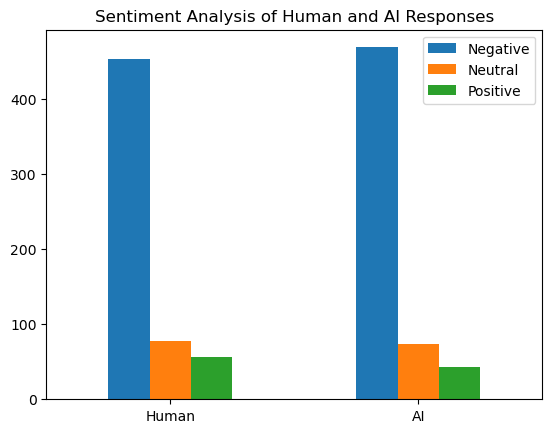

In [76]:
import matplotlib.pyplot as plt

scores = [[453, 77, 56], [469, 74, 43]]
bar_df = pd.DataFrame(scores,
                  columns=['Negative', 'Neutral', 'Positive'],
                  index=['Human', 'AI'])

bar_df.plot.bar(rot=0, title='Sentiment Analysis of Human and AI Responses')